<a href="https://colab.research.google.com/github/parth-ds/Brainwave_Matrix_Intern/blob/main/sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')


In [46]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [48]:
df.shape

(9800, 18)

In [49]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [50]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [51]:
df['Postal Code']=df['Postal Code'].fillna(5401)

In [52]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [53]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55217.343265,230.769059
std,2829.160653,32066.750532,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


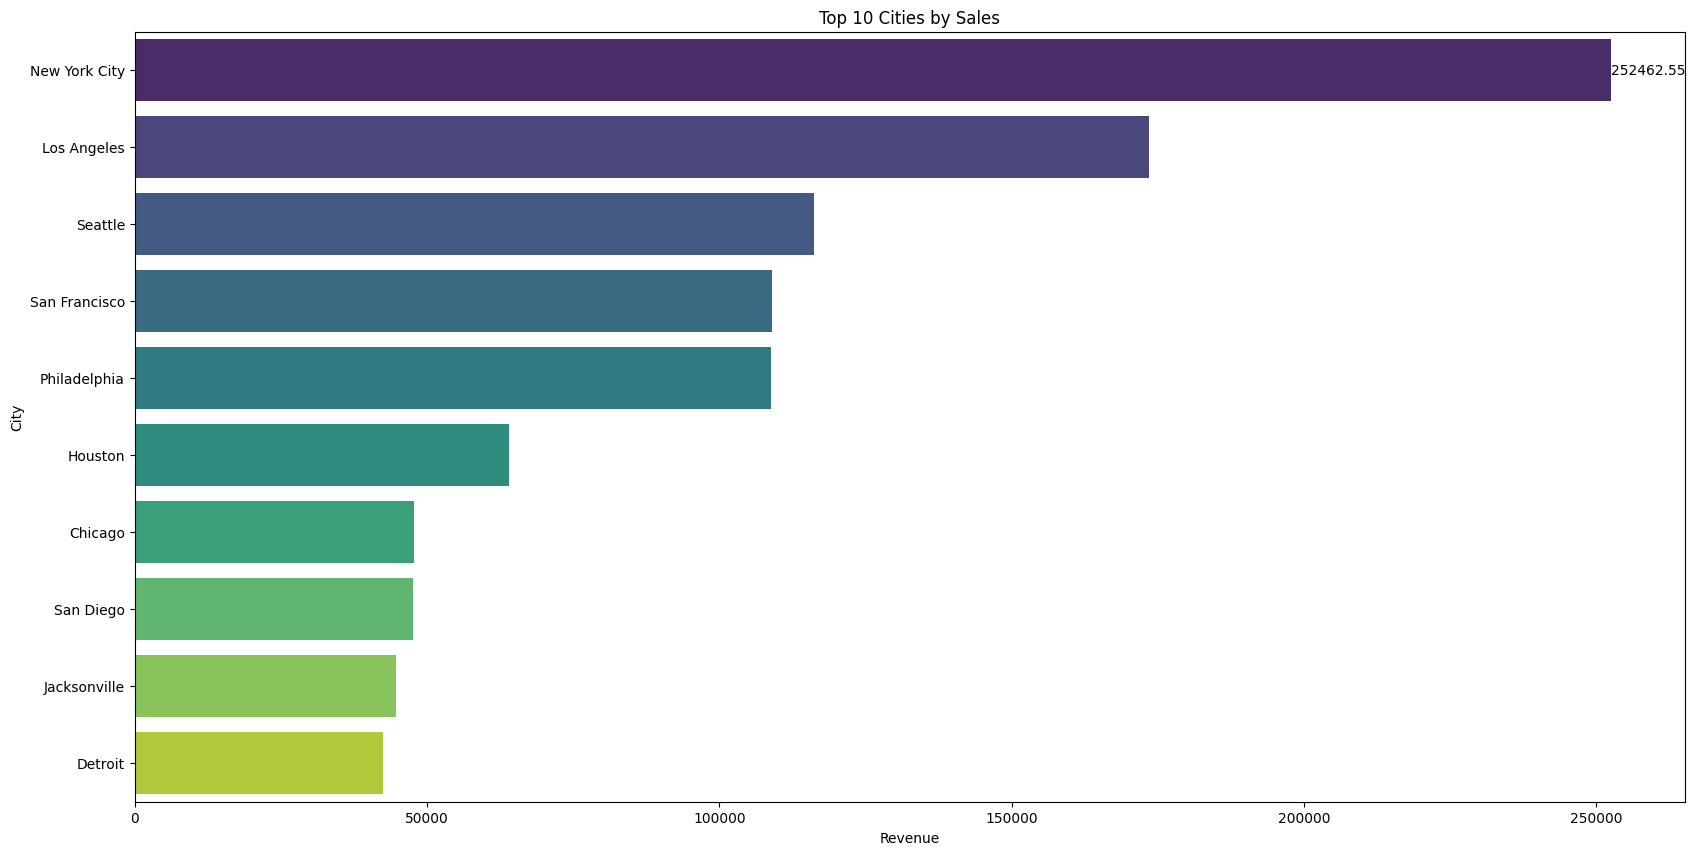

In [54]:
# Top 10 Cities by Sales
top_cities = df.groupby("City")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(20,10))
ax=sns.barplot(x="Sales", y="City", data=top_cities, palette="viridis")
ax.bar_label(ax.containers[0],fmt="%.2f",fontsize=10,color='black')
plt.title("Top 10 Cities by Sales")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()

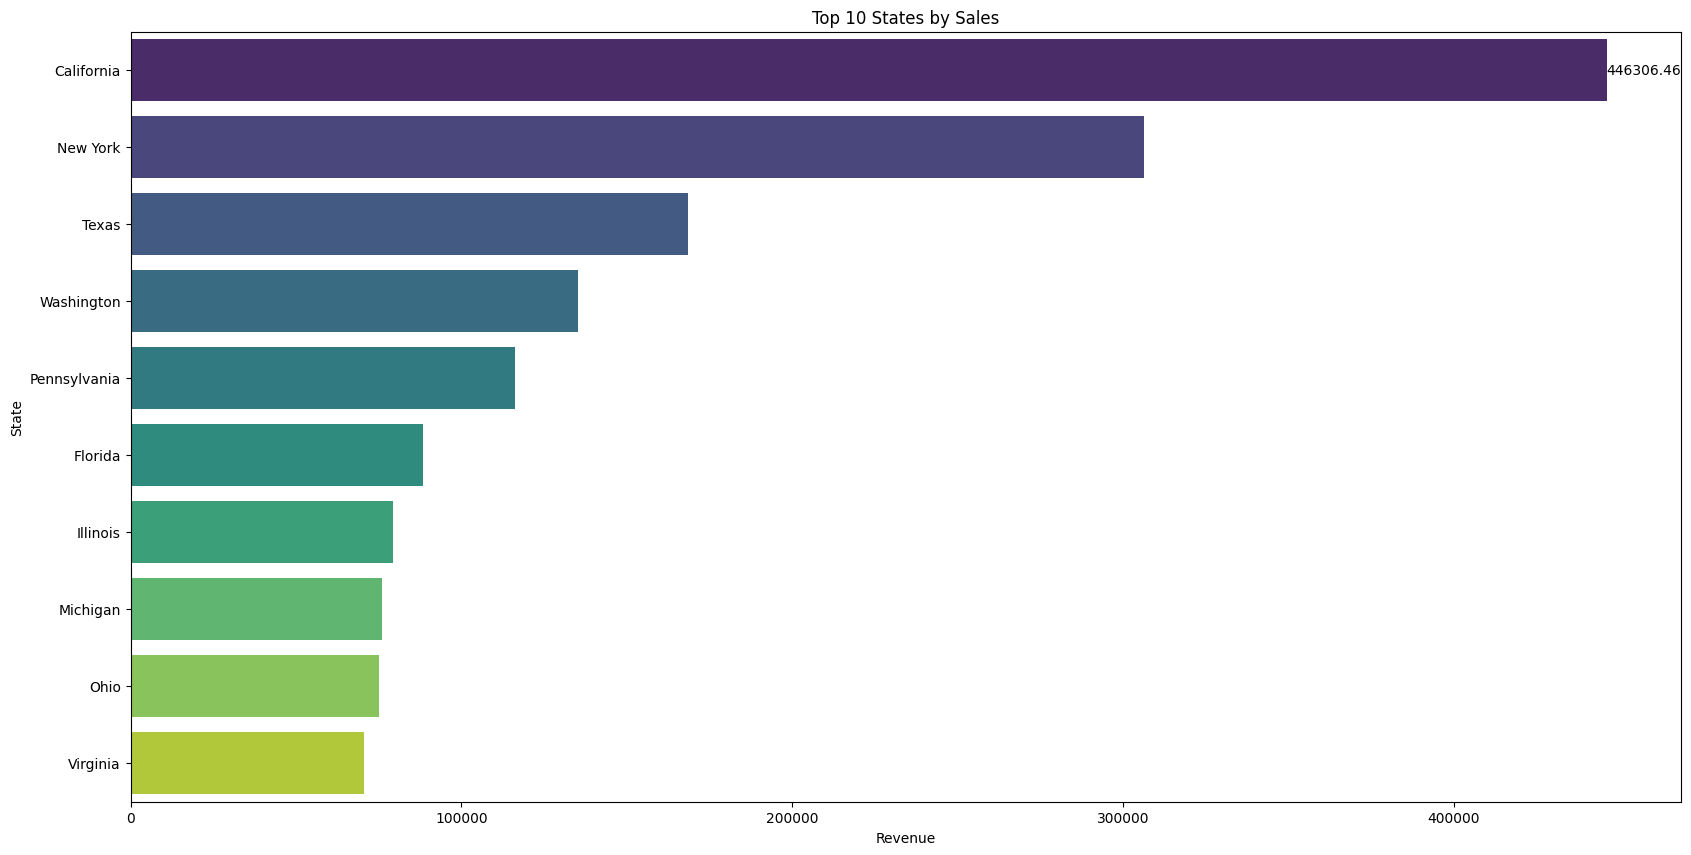

In [55]:
#top10 states in sales
top_states = df.groupby("State")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(20,10))
ax=sns.barplot(x="Sales", y="State", data=top_states, palette="viridis")
ax.bar_label(ax.containers[0],fmt="%.2f",fontsize=10,color='black')
plt.title("Top 10 States by Sales")
plt.xlabel("Revenue")
plt.ylabel("State")
plt.show()
#

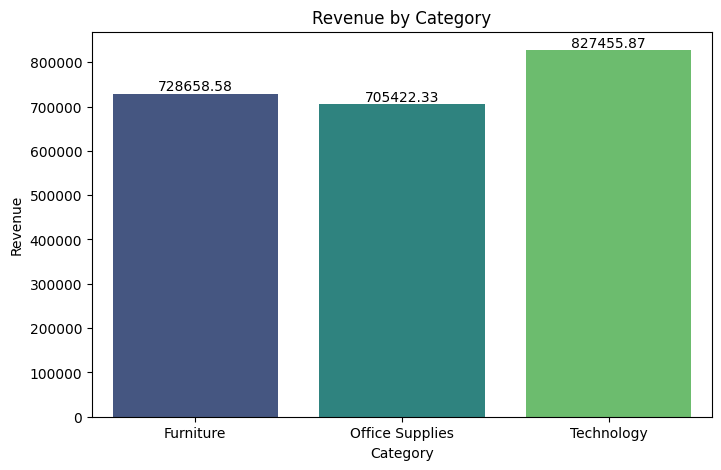

In [56]:
#revenue bye category
revenue_by_category = df.groupby("Category")["Sales"].sum().reset_index()
plt.figure(figsize=(8,5))
ax=sns.barplot(x="Category", y="Sales", data=revenue_by_category, palette='viridis')
ax.bar_label(ax.containers[0],fmt="%.2f",fontsize=10,color='black')
ax.bar_label(ax.containers[1],fmt="%.2f",fontsize=10,color='black')
ax.bar_label(ax.containers[2],fmt="%.2f",fontsize=10,color='black')
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

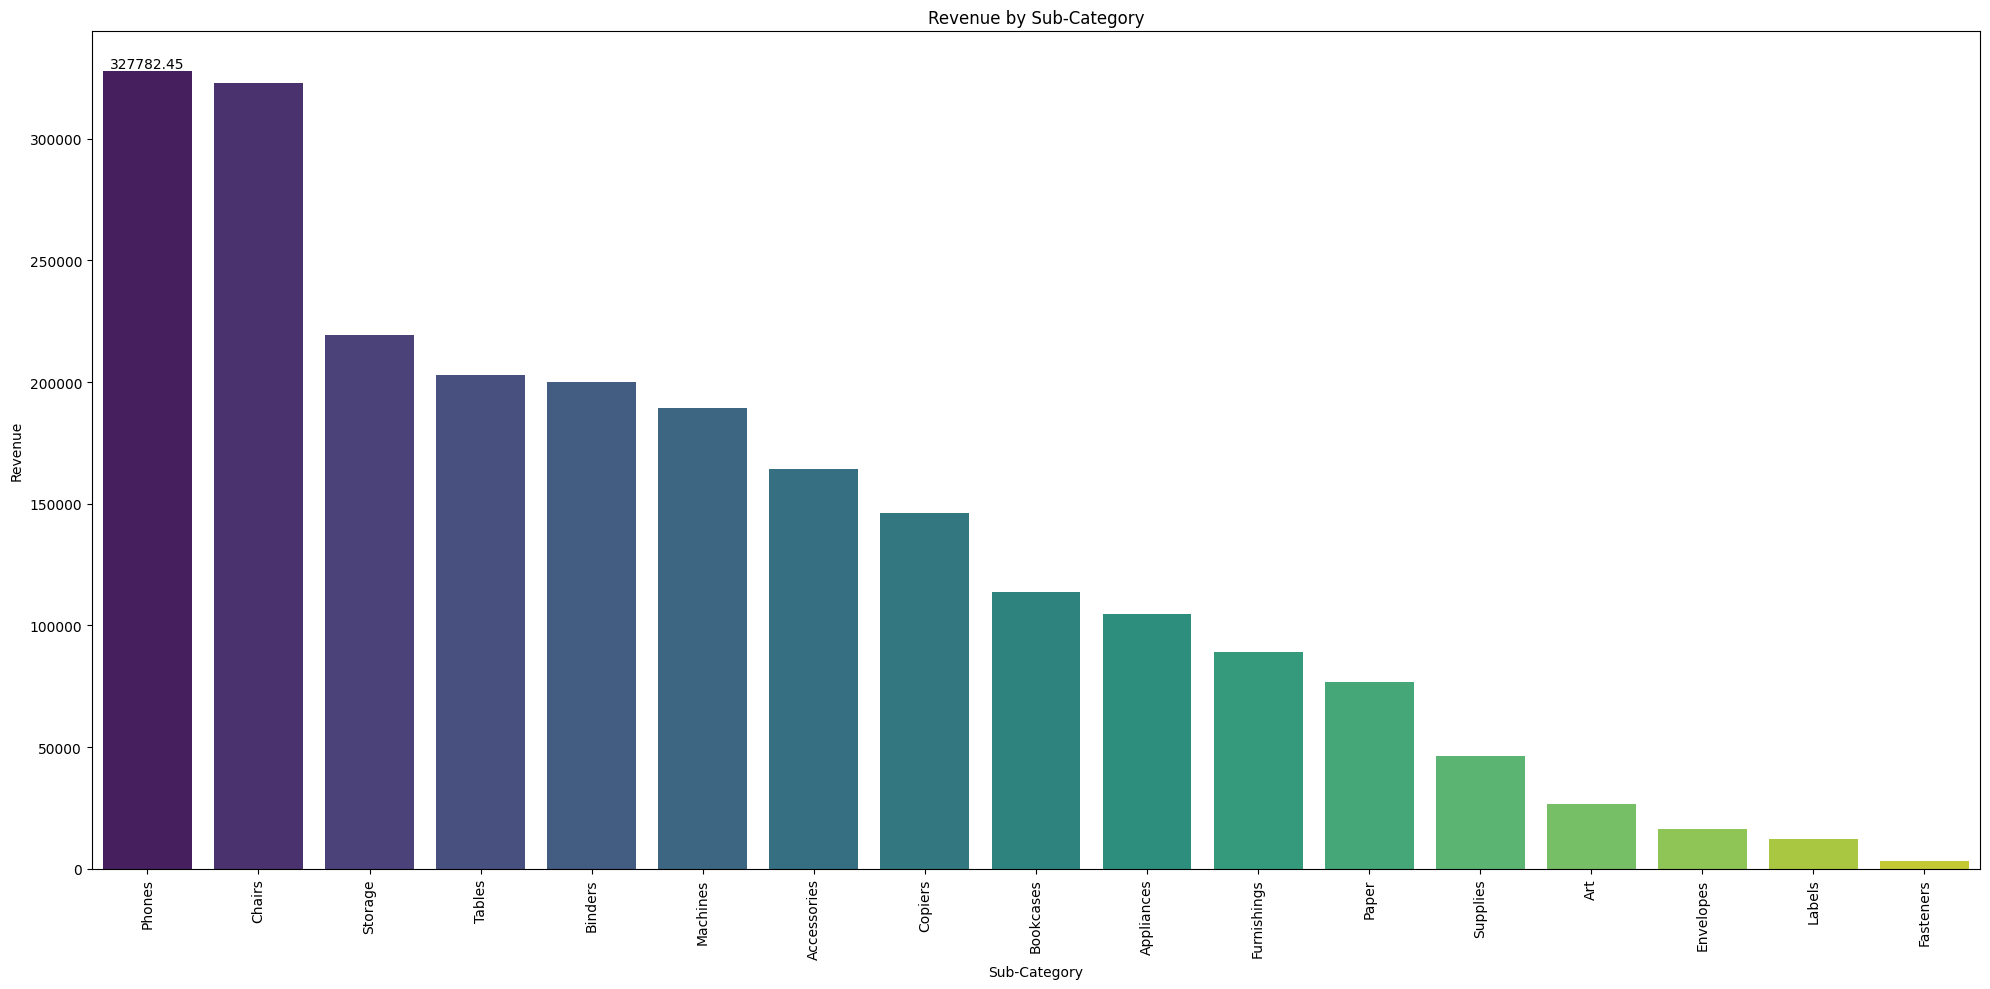

In [57]:
#revenue by subcategory
subcategory_revenue=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Sub-Category',y='Sales',data=subcategory_revenue,palette='viridis')
ax.bar_label(ax.containers[0],fmt="%.2f",fontsize=10,color='black')
plt.title("Revenue by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

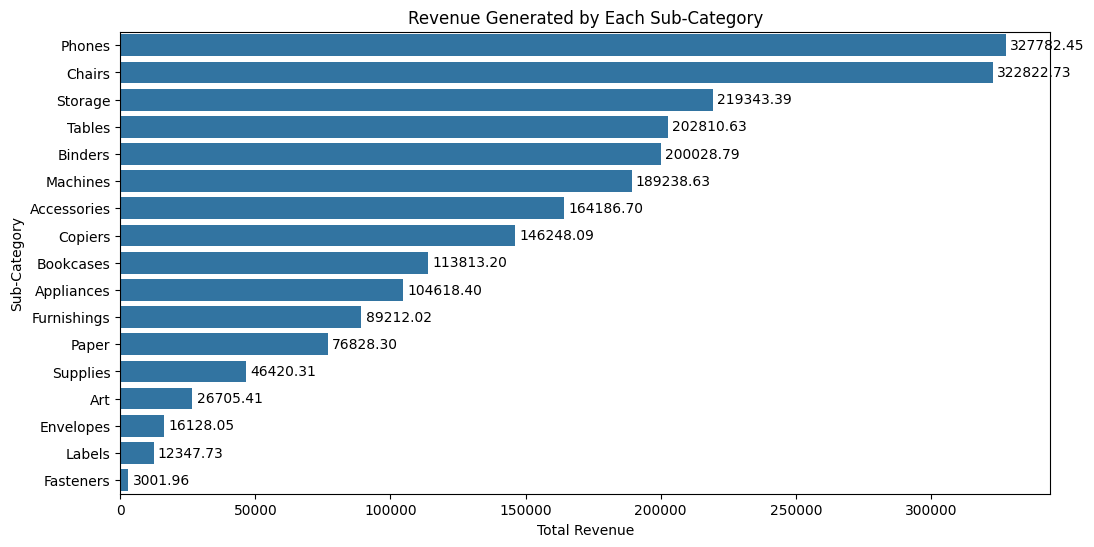

In [58]:
subcat_revenue = df.groupby("Sub-Category")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Sales", y="Sub-Category", data=subcat_revenue)
# Add values on bars
ax.bar_label(ax.containers[0], fmt="%.2f", padding=3, fontsize=10)
plt.title("Revenue Generated by Each Sub-Category")
plt.xlabel("Total Revenue")
plt.ylabel("Sub-Category")
plt.show()

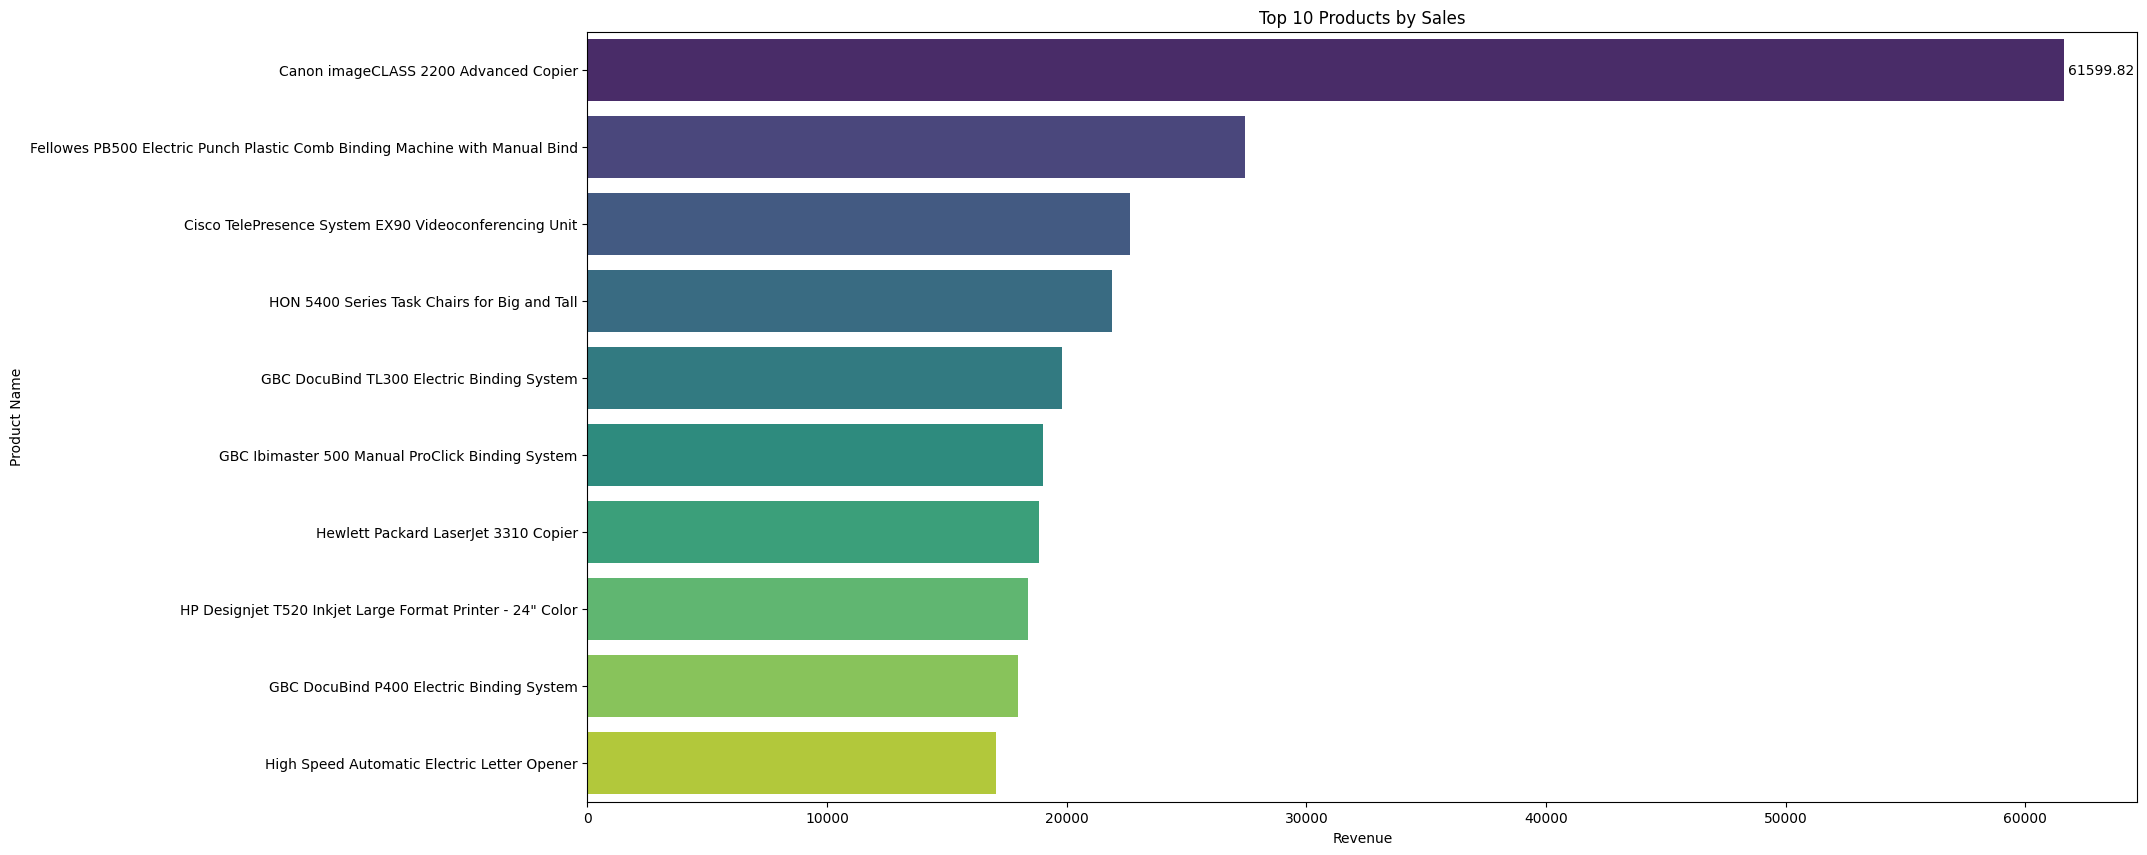

In [59]:
top_products=df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by ="Sales",ascending=False).head(10)
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Sales',y='Product Name',data=top_products,palette='viridis')
ax.bar_label(ax.containers[0],fmt="%.2f",padding=3,fontsize=10,color='black')
plt.title("Top 10 Products by Sales")
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.show()


top 5 selling products

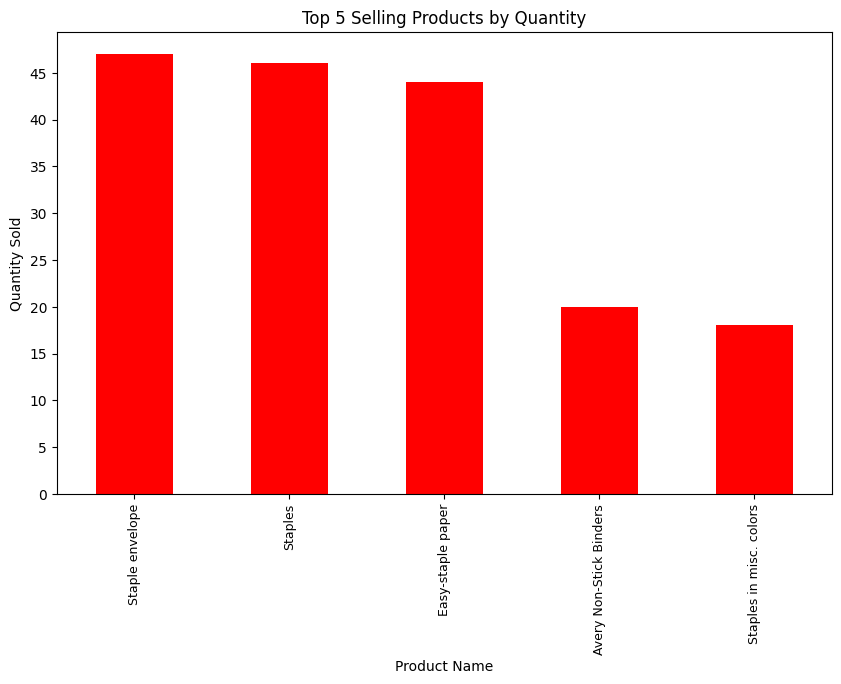

In [60]:
top_selling = df['Product Name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_selling.plot(kind="bar", color='red')
plt.title("Top 5 Selling Products by Quantity")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks( fontsize = 9)
plt.yticks(np.arange(0,50,5))
plt.show()

        Ship Mode         Sales
3  Standard Class  1.340831e+06
2    Second Class  4.499142e+05
0     First Class  3.455723e+05
1        Same Day  1.252190e+05


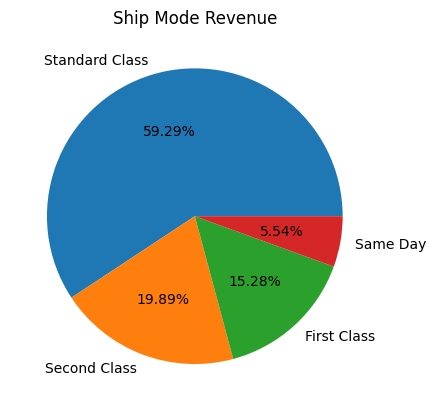

In [61]:
ship_mode_reveue=df.groupby('Ship Mode')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
print(ship_mode_reveue)

plt.pie(ship_mode_reveue['Sales'],labels=ship_mode_reveue['Ship Mode'],autopct='%1.2f%%')
plt.title('Ship Mode Revenue')

plt.show()

**Let's have a look at the sales growth over time**

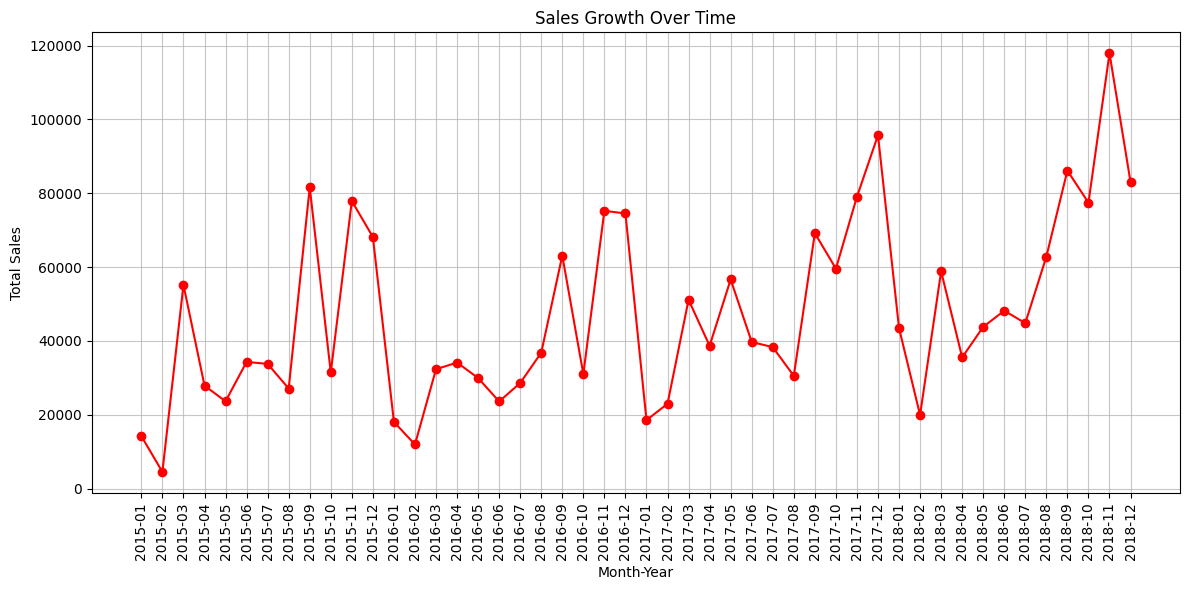

In [62]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Monthly_year"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Monthly_year").Sales.sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o' , color = "Red")
plt.title("Sales Growth Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()